### Descriptive statistics 2

- data distribution:
    - quantiles
    - box-plot
    - histogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris.loc[:, iris.dtypes == 'float'].to_numpy()

#### quantiles

- quantiles are break points in the range of a variable at which a specific proportion of the observations lie below that value and the rest of the observations lie above, e.g.:

    - $q_{10}$ is the value at which 10% of the values lie below that value
    - $q_{25}$ is the value at which 25% of the values lie below that value, also called first (or lower) quartile
    - $q_{50}$ is the value at which 50% of the values lie below that value, also called median
    - $q_{75}$ is the value at which 75% of the values lie below that value, also called third (or upper) quartile

In [4]:
np.quantile(X, [0.1, 0.25, 0.50, 0.75, 0.90], axis = 0)

array([[4.8 , 2.5 , 1.4 , 0.2 ],
       [5.1 , 2.8 , 1.6 , 0.3 ],
       [5.8 , 3.  , 4.35, 1.3 ],
       [6.4 , 3.3 , 5.1 , 1.8 ],
       [6.9 , 3.61, 5.8 , 2.2 ]])

In [5]:
# compare with median
np.median(X, axis = 0)

array([5.8 , 3.  , 4.35, 1.3 ])

In [6]:
# ex: quantiles by class and attribute
print(' '*21, '   min    q10    q25    q50    q75    q90    max')
for j, v in enumerate(iris.columns[iris.dtypes == 'float']):
    print('+ %s ' %v.ljust(18), end = '')
    print('  %5.2f' % X[:, j].min(), end = '')
    print('  %5.2f' *5 % tuple(np.quantile(X[:, j], [0.1, 0.25, 0.50, 0.75, 0.90])), end = '')
    print('  %5.2f' % X[:, j].max())    

                         min    q10    q25    q50    q75    q90    max
+ sepal_length          4.30   4.80   5.10   5.80   6.40   6.90   7.90
+ sepal_width           2.00   2.50   2.80   3.00   3.30   3.61   4.40
+ petal_length          1.00   1.40   1.60   4.35   5.10   5.80   6.90
+ petal_width           0.10   0.20   0.30   1.30   1.80   2.20   2.50


In [7]:
X0 = iris.loc[iris.species == 'setosa', iris.dtypes == 'float'].to_numpy()
X1 = iris.loc[iris.species == 'virginica', iris.dtypes == 'float'].to_numpy()
X2 = iris.loc[iris.species == 'versicolor', iris.dtypes == 'float'].to_numpy()

# statistics by class
print(' '*21, '   min    q10    q25    q50    q75    q90    max')
for spc in iris.species.unique():
    X = iris.loc[iris.species == spc, iris.dtypes == 'float'].to_numpy()
    print(spc.upper())
    for j, v in enumerate(iris.columns[iris.dtypes == 'float']):
        print('- %s   ' % v.ljust(18), end = '')
        print('  %5.2f' % X[:, j].min(), end = '')
        print('  %5.2f' *5 % tuple(np.quantile(X[:, j], [0.1, 0.25, 0.50, 0.75, 0.90])), end = '')
        print('  %5.2f' % X[:, j].max()) 
    print()

                         min    q10    q25    q50    q75    q90    max
SETOSA
- sepal_length            4.30   4.59   4.80   5.00   5.20   5.41   5.80
- sepal_width             2.30   3.00   3.20   3.40   3.68   3.90   4.40
- petal_length            1.00   1.30   1.40   1.50   1.58   1.70   1.90
- petal_width             0.10   0.19   0.20   0.20   0.30   0.40   0.60

VERSICOLOR
- sepal_length            4.90   5.38   5.60   5.90   6.30   6.70   7.00
- sepal_width             2.00   2.30   2.52   2.80   3.00   3.11   3.40
- petal_length            3.00   3.59   4.00   4.35   4.60   4.80   5.10
- petal_width             1.00   1.00   1.20   1.30   1.50   1.51   1.80

VIRGINICA
- sepal_length            4.90   5.80   6.22   6.50   6.90   7.61   7.90
- sepal_width             2.20   2.59   2.80   3.00   3.18   3.31   3.80
- petal_length            4.50   4.90   5.10   5.55   5.88   6.31   6.90
- petal_width             1.40   1.79   1.80   2.00   2.30   2.40   2.50



In [8]:
iris.groupby('species').quantile([0.10, 0.25, 0.50, 0.75, 0.90])

sepal_length  sepal_width  petal_length  petal_width
species                                                              
setosa     0.10         4.590        3.000         1.300         0.19
           0.25         4.800        3.200         1.400         0.20
           0.50         5.000        3.400         1.500         0.20
           0.75         5.200        3.675         1.575         0.30
           0.90         5.410        3.900         1.700         0.40
versicolor 0.10         5.380        2.300         3.590         1.00
           0.25         5.600        2.525         4.000         1.20
           0.50         5.900        2.800         4.350         1.30
           0.75         6.300        3.000         4.600         1.50
           0.90         6.700        3.110         4.800         1.51
virginica  0.10         5.800        2.590         4.900         1.79
           0.25         6.225        2.800         5.100         1.80
           0.50         6.500        3.000         5.550         2.00
           0.75         6.900        3.175         5.875         2.30
           0.90         7.610        3.310         6.310         2.40

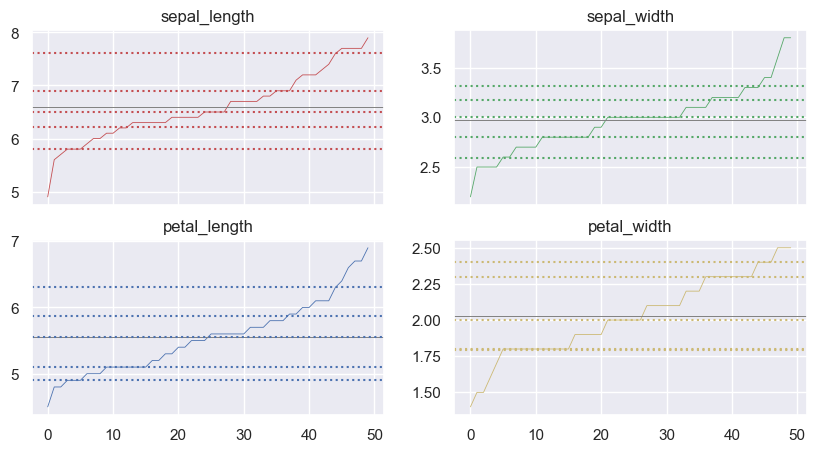

In [9]:
# visualization of the quantiles (mean shown in gray)
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex = True)
for j, name, axj, color in zip(range(X.shape[1]), iris.columns[:4], axs.flatten(), ['r', 'g', 'b', 'y']):
    Xj = X[:, j].copy()
    Xj.sort()
    X_median = Xj[len(Xj) //2]
    axj.plot(Xj, c = color, linewidth = 0.6)
    axj.axhline(X[:, j].mean(), c = 'gray', linewidth = 0.7)
    for X_qxx in np.quantile(Xj, [0.1, 0.25, 0.50, 0.75, 0.90]):
        axj.axhline(X_qxx, c = color, linestyle = 'dotted')
    axj.set_title(name)

#### box-plot
- displays the five-number summary of a set of data: minimum, first quartile, median, third quartile, and maximum.
- the box shows the range from the first quartile to the third quartile
- the horizontal line through the box depicts the median
- the interquantile range is the difference between the upper and lower quartiles, i.e. $\text{iqr} = Q_3 - Q_1 = q_{75} - q_{25}$
- (most commonly) the *whiskers* depict the boundary for values that might be considered as ***outliers***
- the upper/lower values for the *whiskers* are computed respectively as $\left(Q_3 +1.5\,\text{iqr}\right)$ and $\left(Q_1 -1.5\,\text{iqr}\right)$
- ***outiers*** are shown as small circles above/below the *whiskers*

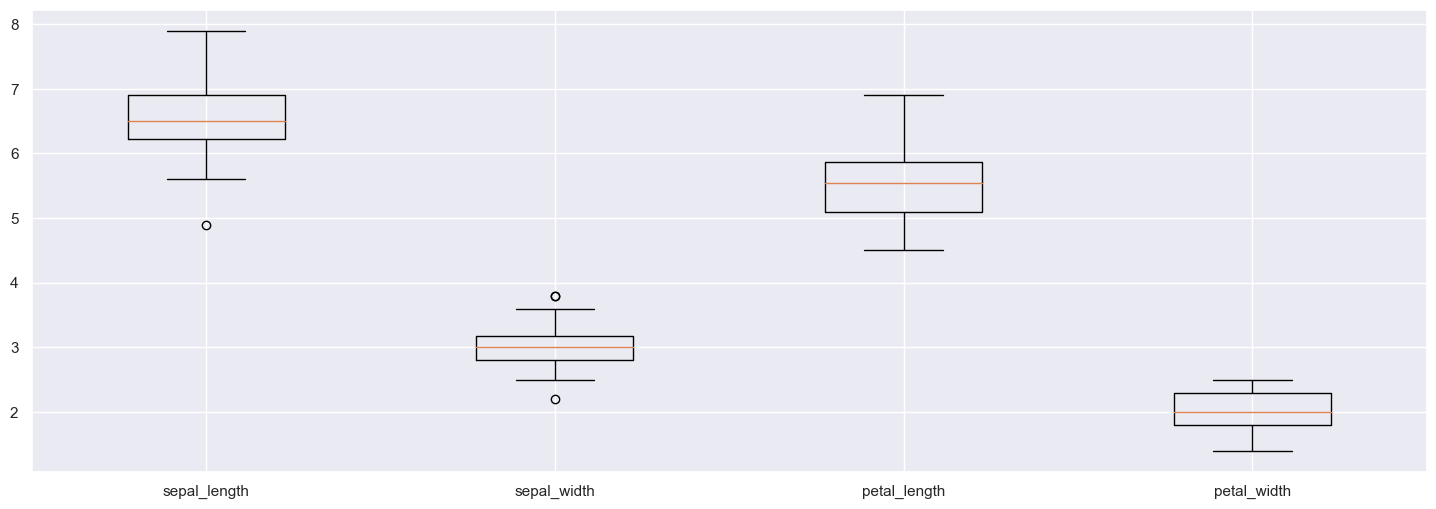

In [10]:
fig, axs = plt.subplots(1, figsize = (18, 6))
_ = axs.boxplot(X)
axs.set_xticks(ticks = axs.get_xticks(), labels = iris.columns[iris.dtypes == 'float']);

##### box-plot by species/attributes (comparative)

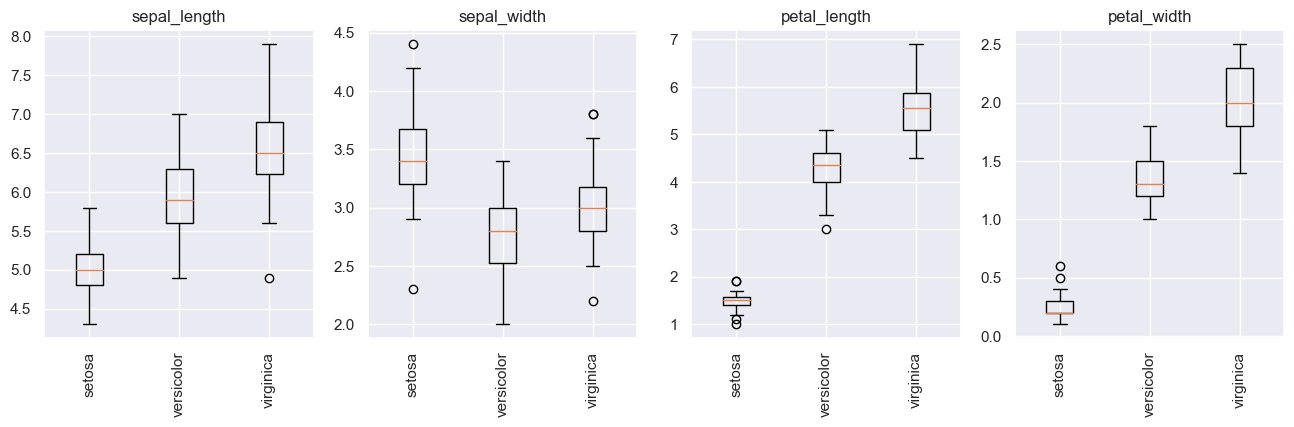

In [11]:
fig, axs = plt.subplots(1, 4, figsize = (16, 4))
for col, axi in zip(iris.columns[iris.dtypes == 'float'], axs.flatten()):
    X_ = np.stack([iris.loc[iris.species == spc, col] for spc in iris.species.unique()], axis = 1)
    _ = axi.boxplot(X_)
    axi.set_title(col)
    axi.set_xticks(ticks = axi.get_xticks(), labels = iris.species.unique(), rotation = 90)

##### box-plot by species/attributes (descriptive)

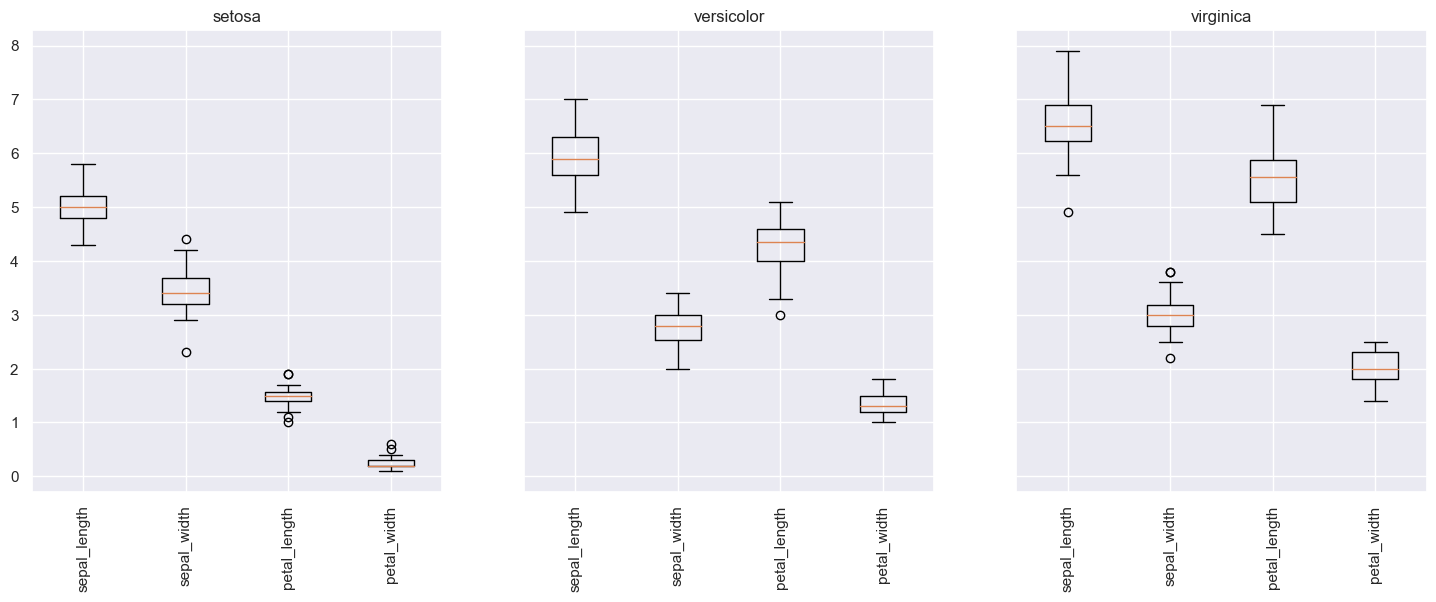

In [12]:
fig, axs = plt.subplots(1, 3, figsize = (18, 6), sharey = True)
for spc, axi in zip(iris.species.unique(), axs.flatten()):
    X_ = np.stack([iris.loc[iris.species == spc, col] for col in iris.columns[iris.dtypes == 'float']], axis = 1)
    _ = axi.boxplot(X_)
    axi.set_title(spc)
    axi.set_xticks(ticks = axi.get_xticks(), labels = iris.columns[iris.dtypes == 'float'], rotation = 90)

##### using pandas.boxplot() (??)

C:\Users\jaume\AppData\Local\Temp\ipykernel_13576\9199397.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  iris.boxplot(by = 'species', column = iris.columns[iris.dtypes == 'float'].to_list(), ax = axs);


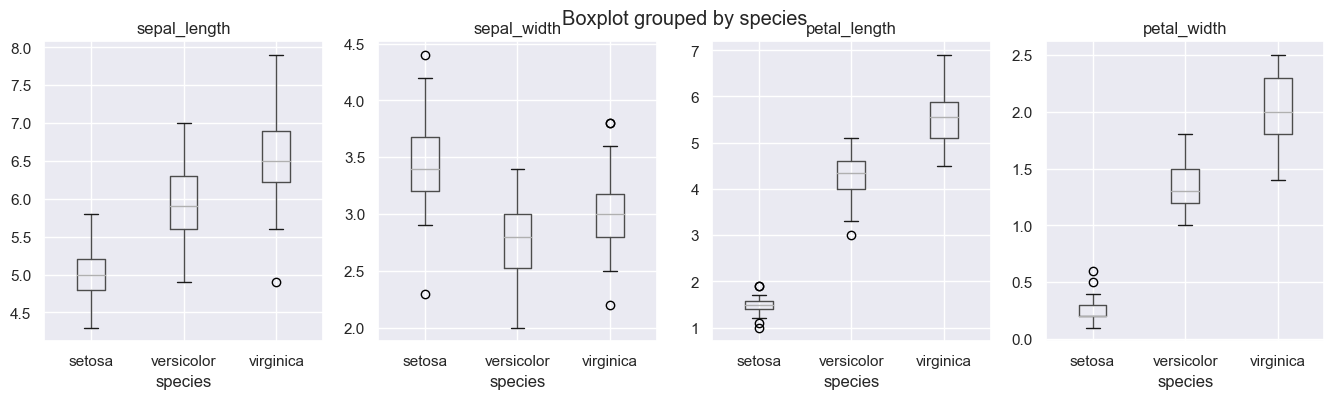

In [13]:
fig, axs = plt.subplots(1, 4, figsize = (16, 4))
fig.suptitle('')
iris.boxplot(by = 'species', column = iris.columns[iris.dtypes == 'float'].to_list(), ax = axs);

#### histogram

- A histogram is a graph that shows the frequency distribution of datapoints using rectangles.
- The height of the rectangle is proportional to the frequency and the width of the rectangle is proportional to the class interval.
- A histogram is an approximate representation of the probability density of the data.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([19, 20, 19, 21, 15, 20, 19, 27, 15, 25], dtype=int64))

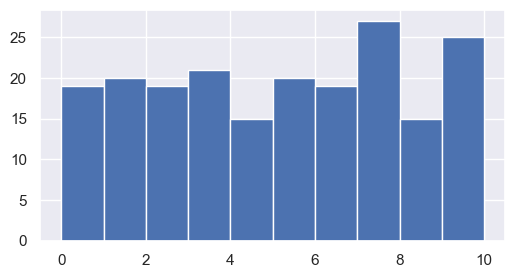

In [21]:
# ex: a categorical variable with 10 classes
X = np.random.randint(0, 10, 200)
# histogram
_, axs = plt.subplots(1, 1, figsize = (6, 3))
axs.hist(X, bins = [b for b in range(11)])
# counts
np.unique(X, return_counts = True)

- Numerical variables must be *binned*
- Binning refers to the process of dividing a continuous variable into discrete intervals called ***bins***
- Each *bin* represents a range of values, and the histogram shows the frequency or count of data points falling into each bin.

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

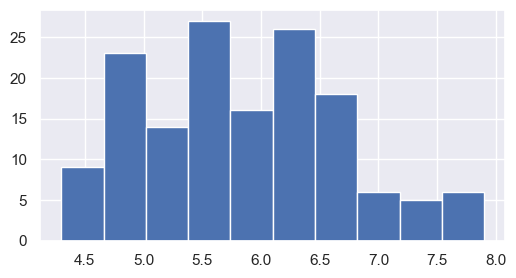

In [15]:
_, axs = plt.subplots(1, 1, figsize = (6, 3))
axs.hist(iris.sepal_length)

#### histogram by species/attributes

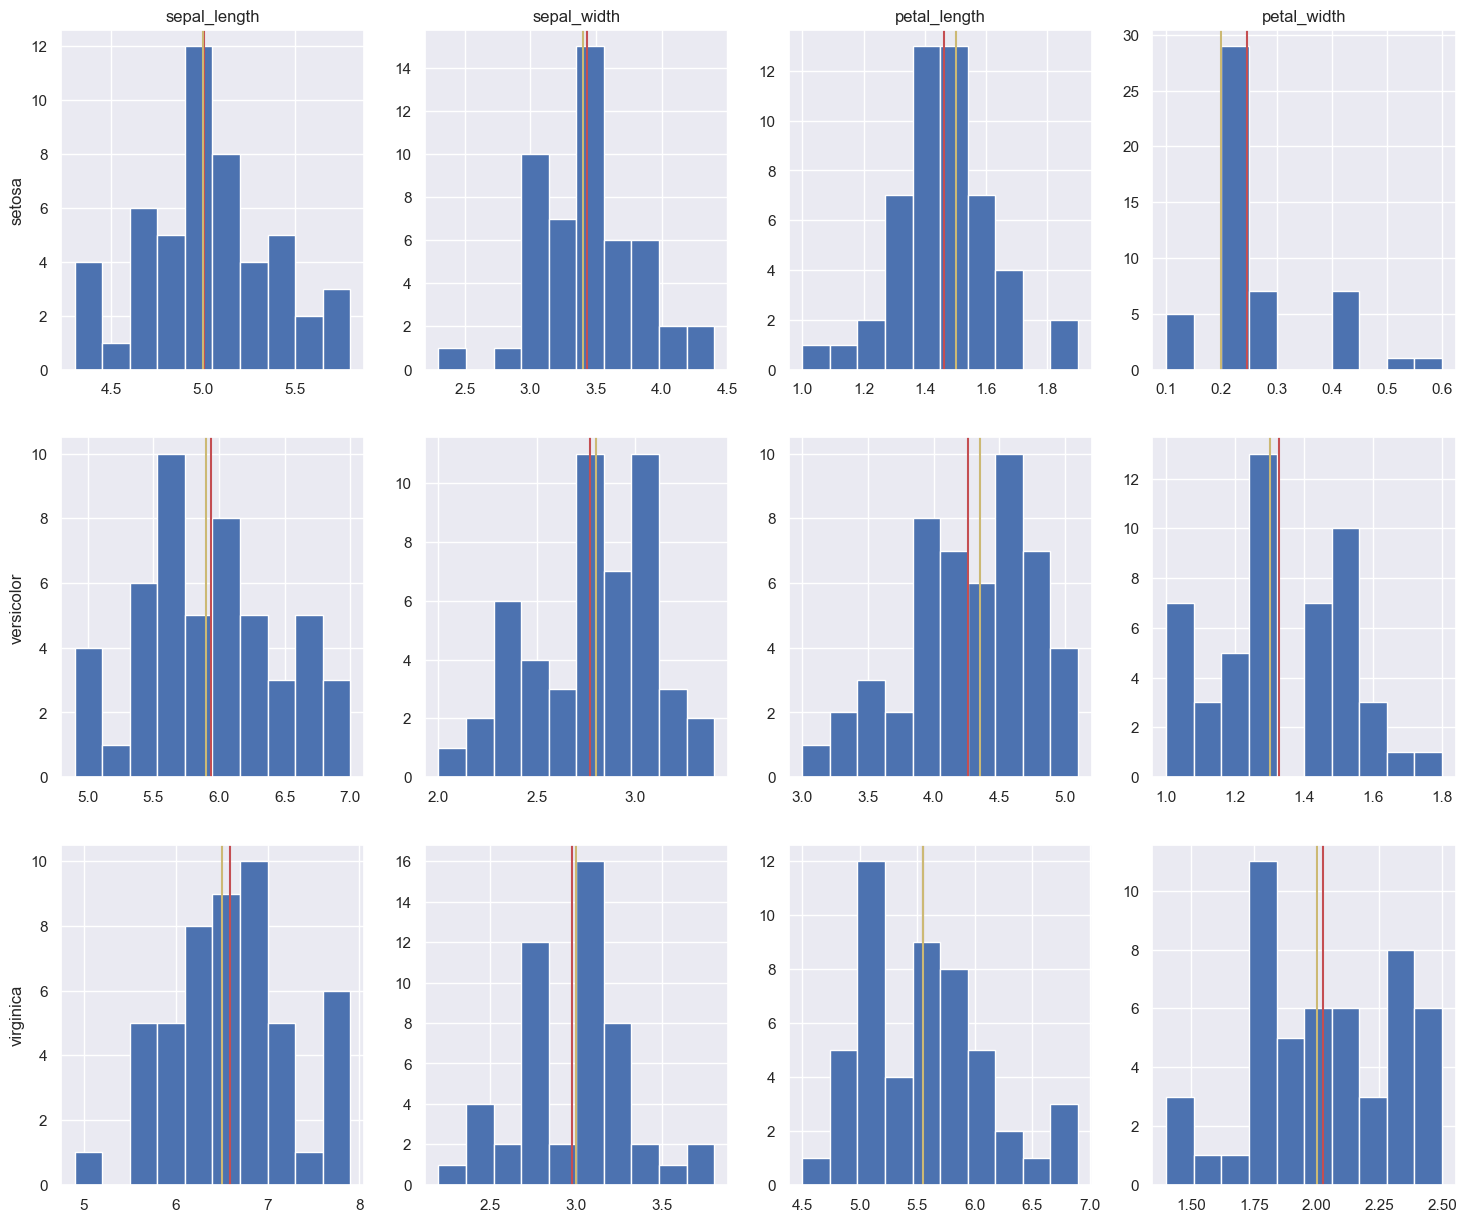

In [16]:
fig, axs = plt.subplots(3, 4, figsize = (18, 15))
for i, spc in enumerate(iris.species.unique()):
    for j, col in enumerate(iris.columns[iris.dtypes == 'float']):
        X_ = iris.loc[iris.species == spc, col]
        axs[i, j].hist(X_)
        axs[i, j].axvline(x = X_.mean(), c = 'r')
        axs[i, j].axvline(x = np.median(X_), c = 'y')
        if i == 0: axs[i, j].set_title(col)
        if j == 0: axs[i, j].set_ylabel(spc)